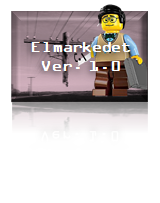

**1. Forretningsforståelse**

```
“Det første er at forstå det forretningsmæssige perspektiv grundigt. 
- Hvad ønsker kunden at opnå?
Indsaml information om forretningssituationen for organisationen. 
Dette lettere identificering af forretningsmål, men identificerer dertil resourcer, 
så som data, viden, personale og hardware resourcer, som senere kan anvendes.
Kunden har mange konkurrerende mål og begrænsninger, der skal være korrekt afstemt. 
Analytikerens mål er at afdække vigtige faktorer i starten af ​​projektet, som kan påvirke det endelige resultat. 
Forsømmelse af dette trin kan resulterer i tid anvendt på at svare rigtigt på de forkerte spørgsmål”

```
<p align = "right"> CRISP-DM 1.0</p>


**Ydelse - Internt Markedet**

Når vi addressere det interne markedet, må vi forstå ydelse. Vores tilgang må tage hånd om større interne påvirkninger, som for eksempel: 
*   Ny teknologi opstår - 	Med hvilken data kan markedets størrelse og værdi af novelitet estimeres (f.eks. Bringing New Technology to Market)
*  Running out of road - 	Med hvilken data kan markedets størrelse og offeromkostninger ved inaktion (forældelse) estimeres (f.eks. Good to Great)
*  Deregulering/ nyt reguleratorisk regime - 	Med hvilken data kan vækst af markedet og omkostninger til efterleven af teknologisk arv estimeres (f.eks. The 4th industrial revolution)
*  Utænkelig hændelser -  	Med hvilken data eksponering og muligheder genvurderes (f.eks. Global Catastrophic Risks)





Derfor kan det være nødvendigt at foretage en leverance analyse.


**Mulighedsrum for drifttiltag**

Hvilken fase ønsker jeg at forbedre?

*   **Kontrol** - Hvad er hændt og hvad foregår? Udgangspunkt er fakta, data og værdier, som giver en detajleret analyse.
*   **Diagnose** - Hvorfor er hændelsen indtraffet? Eksaminering af den beskrevende viden og opfordring til årsagsidentification
*   **Forudsigelse** - Hvad vil indtræffe? Faktorer og fokus på fremtidigt udfald.
*   **Prognose** - Hvilkle aktioner burde gøres og hvorfor? Med fokus på beslutningstagning og forbedringer.

<br>
<br>
<br>
<br>
</br>

**Tingens Internet**

Til forskel for de hidtidige anvendelser, implementeres drift løsninger oftest i større infrastrukturer, med geografisk spredning, uensartede datasæt og behov for resultater i nutid. Dette paradigmeshift i data analyse referes oftest til som Tingenes Internet eller *Internet of things* (IoT). 
Eksempler inden IoT er stigende, men stadigt i et tidligt stadie. 
> For eksempel, indenfor energisektoren er konceptet om en forbruger, som både aftager strøm og forbruger strøm under udvikling og beskrevet ved ordet *pro-sumer*. Intelligent energiteknologi og driftbeslutninger sikre at prosumeren opnår den optimale energibalance for import og eksport af energi.



Datasæt:
*   https://www.nordpoolgroup.com/historical-market-data/    -   elspot-prices_2020_hourly_dkk.xls

Yderligere datasæt med distributions omkostninger:

https://www.statnett.no/for-aktorer-i-kraftbransjen/tall-og-data-fra-kraftsystemet/last-ned-grunndata/

Indlæsning af relevant bibliotekker

In [ ]:
#@title læs bibliotekker
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
import pandas as pd

Først forsøger vi at indlæse en excel, som en excel fil.

In [ ]:
#@title indlæse excel fil i excel format
url = "https://www.nordpoolgroup.com/globalassets/marketdata-excel-files/elspot-prices_2020_hourly_dkk.xls"

energipriser_raw=pd.read_excel(url,sheet_name=None) 
energipriser_raw.head()


XLRDError: ignored

Fejlmeddelsen fortæller at ".xls" filen ikke er formateret, som en excel fil, og muligvis som en html ("b'\r\n<html>")

In [4]:
#@title indlæse Excel fil i html format
import pandas as pd

#url="https://www.nordpoolgroup.com/globalassets/marketdata-excel-files/elspot-prices_2018_hourly_nok.xls"
#url="https://www.nordpoolgroup.com/globalassets/marketdata-excel-files/elspot-prices_2019_hourly_nok.xls"
url="https://www.nordpoolgroup.com/globalassets/marketdata-excel-files/elspot-prices_2020_hourly_nok.xls"


energipriser_raw_html = pd.read_html(url)
energipriser_raw = pd.DataFrame(energipriser_raw_html[0])
energipriser_raw



Elspot Prices in NOK/MWh                    ...              
     Data was last updated 14-10-2020                    ...              
                   Unnamed: 0_level_2    Hours      SYS  ... DE-LU  FR  NL
0                          01-01-2020  00 - 01  30419.0  ...   NaN NaN NaN
1                          01-01-2020  01 - 02  30212.0  ...   NaN NaN NaN
2                          01-01-2020  02 - 03  29965.0  ...   NaN NaN NaN
3                          01-01-2020  03 - 04  29630.0  ...   NaN NaN NaN
4                          01-01-2020  04 - 05  29157.0  ...   NaN NaN NaN
...                               ...      ...      ...  ...   ...  ..  ..
6931                       15-10-2020  19 - 20  26989.0  ...   NaN NaN NaN
6932                       15-10-2020  20 - 21  24160.0  ...   NaN NaN NaN
6933                       15-10-2020  21 - 22  23358.0  ...   NaN NaN NaN
6934                       15-10-2020  22 - 23  22209.0  ...   NaN NaN NaN
6935                       15-10-2020  23 - 00  20800.0  ...   NaN NaN NaN

[6936 rows x 24 columns]

For at få en overblik over kolonner, i datasættet ses med følgende

```
data.info()
```


In [5]:
#@title data.info()
energipriser_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 24 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   (Elspot Prices in NOK/MWh, Data was last updated 14-10-2020, Unnamed: 0_level_2)  6936 non-null   object 
 1   (Elspot Prices in NOK/MWh, Data was last updated 14-10-2020, Hours)               6936 non-null   object 
 2   (Elspot Prices in NOK/MWh, Data was last updated 14-10-2020, SYS)                 6935 non-null   float64
 3   (Elspot Prices in NOK/MWh, Data was last updated 14-10-2020, SE1)                 6935 non-null   float64
 4   (Elspot Prices in NOK/MWh, Data was last updated 14-10-2020, SE2)                 6935 non-null   float64
 5   (Elspot Prices in NOK/MWh, Data was last updated 14-10-2020, SE3)                 6935 non-null   float64
 6   

Kolonnenavner er dårligt formatter. Kolonnenavne har mellemrum, paranteser, og tegn (/).
For en god ordensskyld kan kolonnenavne gennavngives.

In [9]:
#@title omnavngivning af kolonner
column_names=['Dato','Hours','SYS','SE1','SE2','SE3','SE4','FI','DK1','DK2','Oslo','Kr_sand','Bergen','Molde','Trondheim','Tromsoe','EE','LV','LT','AT','BE','DE_LU','FR','NL']
test=energipriser_raw
col_dict = {test.columns[0]: column_names[0], test.columns[1]: column_names[1], test.columns[2]: column_names[2], test.columns[3]: column_names[3], test.columns[4]: column_names[4], test.columns[5]: column_names[5], test.columns[6]: column_names[6], test.columns[7]: column_names[7], test.columns[8]: column_names[8], test.columns[9]: column_names[9], test.columns[10]: column_names[10], test.columns[11]: column_names[11],test.columns[12]: column_names[12], test.columns[13]: column_names[13], test.columns[14]: column_names[14], test.columns[15]: column_names[15], test.columns[16]: column_names[16], test.columns[17]: column_names[17], test.columns[18]: column_names[18], test.columns[19]: column_names[19], test.columns[20]: column_names[20], test.columns[21]: column_names[21],test.columns[22]: column_names[22], test.columns[23]: column_names[23]}   ## key→old name, value→new name

test.columns = [col_dict.get(x, x) for x in test.columns]
test.columns
energipriser=test
energipriser=pd.DataFrame(energipriser)
energipriser

Dato    Hours      SYS      SE1      SE2  ...  BE  DE_LU  FR  NL  Hour
0     01-01-2020  00 - 01  30419.0  28387.0  28387.0  ... NaN    NaN NaN NaN     1
1     01-01-2020  01 - 02  30212.0  28062.0  28062.0  ... NaN    NaN NaN NaN     2
2     01-01-2020  02 - 03  29965.0  27519.0  27519.0  ... NaN    NaN NaN NaN     3
3     01-01-2020  03 - 04  29630.0  27144.0  27144.0  ... NaN    NaN NaN NaN     4
4     01-01-2020  04 - 05  29157.0  27164.0  27164.0  ... NaN    NaN NaN NaN     5
...          ...      ...      ...      ...      ...  ...  ..    ...  ..  ..   ...
6931  15-10-2020  19 - 20  26989.0  31119.0  31119.0  ... NaN    NaN NaN NaN    20
6932  15-10-2020  20 - 21  24160.0  30598.0  30598.0  ... NaN    NaN NaN NaN    21
6933  15-10-2020  21 - 22  23358.0  27759.0  27759.0  ... NaN    NaN NaN NaN    22
6934  15-10-2020  22 - 23  22209.0  24659.0  24659.0  ... NaN    NaN NaN NaN    23
6935  15-10-2020  23 - 00  20800.0  21689.0  21689.0  ... NaN    NaN NaN NaN     0

[6936 rows x 25 columns]

Time interval må omskrives til en diskret timeværdi

In [7]:
#@title Omskrive timeinterval til diskret time
energipriser['Hour']=energipriser.Hours.str.split("-",expand=True)[1].astype('int32') 
energipriser['Hour']

0        1
1        2
2        3
3        4
4        5
        ..
6931    20
6932    21
6933    22
6934    23
6935     0
Name: Hour, Length: 6936, dtype: int32

Dernæst er det nødvendigt at tilføje formatering, såledelse at dato-teksten bliver fortolket som en dato

In [8]:
#@title Tilføj korrekt tidsformat til dato-tekst
dates = pd.to_datetime(energipriser['Dato'])
dates=dates.apply(lambda x: x.strftime('%d-%m-%Y'))
dates

0       01-01-2020
1       01-01-2020
2       01-01-2020
3       01-01-2020
4       01-01-2020
           ...    
6931    15-10-2020
6932    15-10-2020
6933    15-10-2020
6934    15-10-2020
6935    15-10-2020
Name: Dato, Length: 6936, dtype: object

Ved at lægge dato og timekolonnen sammen i korrekt formattering, har vi nu en tidsserie. 

In [ ]:
#@title Generere tidsserie index
energipriser.Tid=pd.to_datetime(dates)+energipriser['Hour'].astype('timedelta64[h]')

energipriser.index=energipriser.Tid
energipriser.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-10-10 15:00:00', '2020-10-10 16:00:00',
               '2020-10-10 17:00:00', '2020-10-10 18:00:00',
               '2020-10-10 19:00:00', '2020-10-10 20:00:00',
               '2020-10-10 21:00:00', '2020-10-10 22:00:00',
               '2020-10-10 23:00:00', '2020-10-10 00:00:00'],
              dtype='datetime64[ns]', length=6816, freq=None)

Datasættet kan visende såledelse

In [ ]:
#@title Visning af de først 1000 punkter af datasættet

alt.data_transformers.disable_max_rows()

source=energipriser[:1000]

source['Timestamp']=source.index


alt.Chart(source).transform_fold(
    ['SYS','SE1','SE2','SE3','SE4','FI','DK1','DK2','Oslo','Kr_sand','Bergen','Molde','Trondheim','Tromsoe','EE','LV','LT','AT','BE','DE_LU','FR','NL']

).mark_line().encode(
    x='Timestamp:T',
    y='value:Q',
    color='key:N'
).properties(width=600,height=500).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



alt.Chart(...)

Hele datasættet kan også vises ved markering af det relevante segment

In [ ]:
#@title Interaktivt valg af tidsserie segment
alt.data_transformers.disable_max_rows()

source=energipriser
source['Timestamp']=source.index

brush = alt.selection(type='interval', encodings=['x'] )



base = alt.Chart(source).transform_fold(
    ['SYS','SE1','SE2','SE3','SE4','FI','DK1','DK2','Oslo','Kr_sand','Bergen','Molde','Trondheim','Tromsoe','EE','LV','LT','AT','BE','DE_LU','FR','NL']

).mark_line().encode(
    x='Timestamp:T',
    y='value:Q',
    color='key:N'
).properties(
    width=600,
    height=400
)

upper = base.encode(
    alt.X('Timestamp:T', scale=alt.Scale(domain=brush))
)

lower = base.properties(
    height=60
).add_selection(brush)


upper & lower


alt.VConcatChart(...)

For at forudsige datasættet, kræver det at angive parameteren som man vil forudsige (y-parameteren) og en dato parameter (ds-parameteren)

In [ ]:
#@title Valg af forudsigelse parameter
df=pd.DataFrame()
df['y']=energipriser.DK2
df['ds']=energipriser.index
df

y                  ds
2020-01-01 01:00:00  32964.0 2020-01-01 01:00:00
2020-01-01 02:00:00  31336.0 2020-01-01 02:00:00
2020-01-01 03:00:00  31139.0 2020-01-01 03:00:00
2020-01-01 04:00:00  30853.0 2020-01-01 04:00:00
2020-01-01 05:00:00  30429.0 2020-01-01 05:00:00
...                      ...                 ...
2020-10-10 20:00:00  32439.0 2020-10-10 20:00:00
2020-10-10 21:00:00  28638.0 2020-10-10 21:00:00
2020-10-10 22:00:00  25675.0 2020-10-10 22:00:00
2020-10-10 23:00:00  24259.0 2020-10-10 23:00:00
2020-10-10 00:00:00  19477.0 2020-10-10 00:00:00

[6816 rows x 2 columns]

For en sikkerhedsskyld, kan vi checke datasættet

In [ ]:
#@title Vis data, som vi ønsker at forudsige
import altair as alt
alt.data_transformers.disable_max_rows()

alt.Chart(df).mark_line().encode(
    x='ds:T',
    y='y:Q'
)

alt.Chart(...)

Dernæst anvendes Facebook Prophet til at forudsige data, baseret på historiske data.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


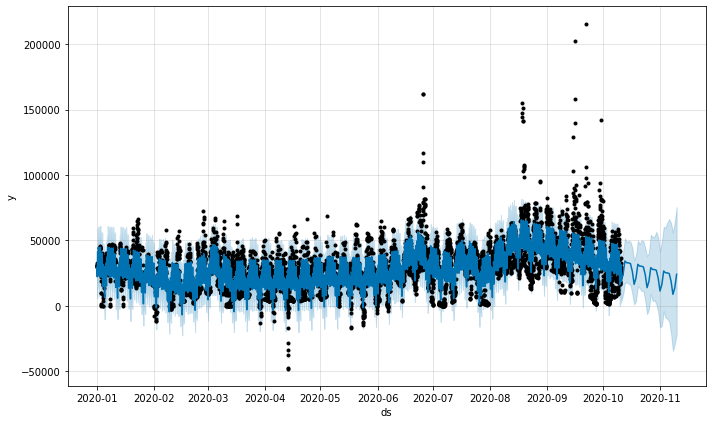

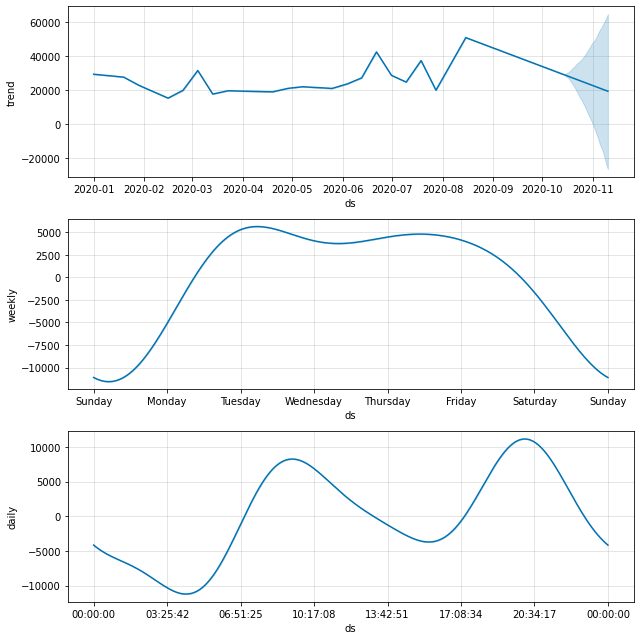

In [ ]:
#@title Forudsigelse
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

Usikkerhed=0.4
m = Prophet(changepoint_prior_scale=Usikkerhed,daily_seasonality=True)
m.fit(df)


future = m.make_future_dataframe(periods=30)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
